# Atividade avançada- implementação do ```plt.imshow()```

A partir dos dados da atividade mínima e utilizando o ```np.load```, foi criado o mapa de calor. Para isso, foi estabelecida a função 


```
def mapa_calor_histograma(posicoes, titulo, subplot):
    hist, x_edges, y_edges = np.histogram2d(  #cria um histograma bidimensional)
        np.arange(len(posicoes)),  # cria uma sequencia do tamanho da lista posições
        posicoes,                  # eixo y: posições
        bins=[30, 30]              # número de bins para cada eixo(30 divisoes em cada direção )
    )

```
para criar o histograma. Essa função retorna hist: A matriz 2D com a contagem de ocorrências em cada bin; x_edges: os limites dos bins no eixo x; y_edges: os limites dos bins no eixo y. Por fim, para criar o mapa das cores, foi utilizado o ```plt.imshow()``` para exibir o mapa a partir de uma matriz de valores


```
plt.imshow(hist.T,  #transposta da matriz do histrograma para que os eixos não fiquem invertidos
    aspect='auto', 
    origin='lower', # Define que a origem (0,0) da imagem será no canto inferior esquerdo.
    cmap='viridis',  #estilo do mapa das cores
    extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])  Define os limites dos eixos x e y na imagem.
```

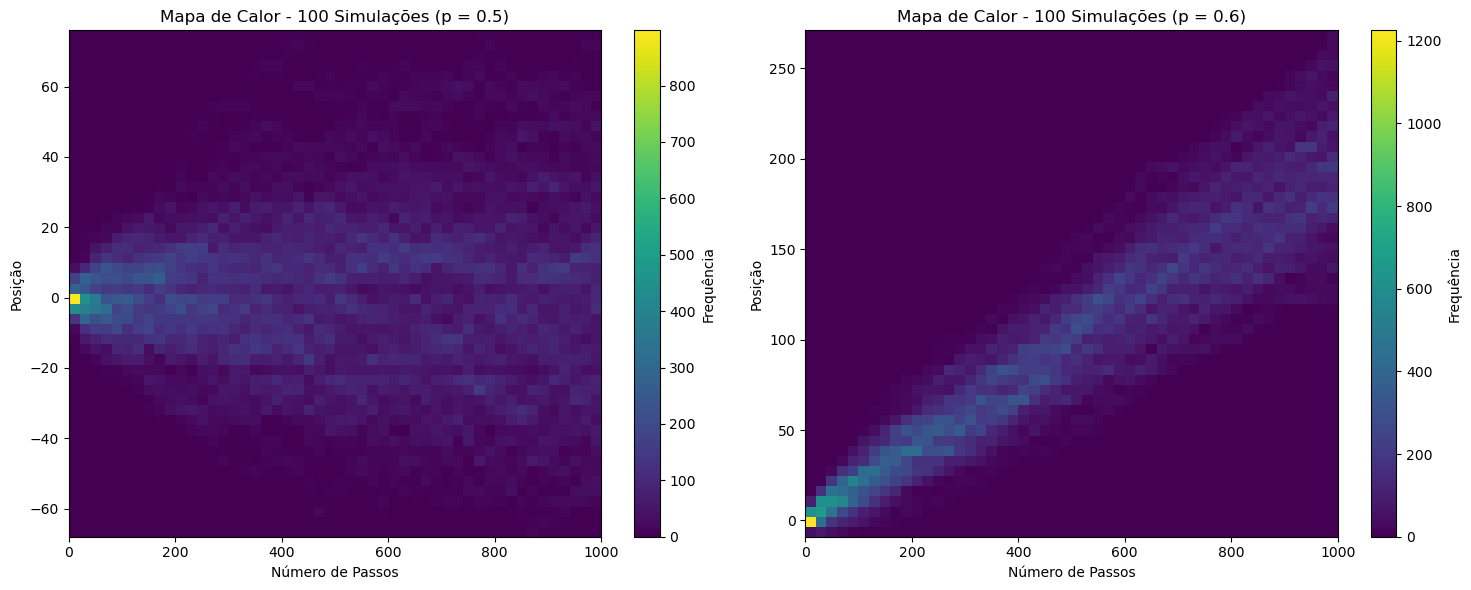

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


dados = np.load('todas_posicoes_passeio.npz')

# Obter os dados para p=0.5 e p=0.6
posicoes_p05 = dados['posicoes_p05']  # (100 simulações, 1000 passos)
posicoes_p06 = dados['posicoes_p06']  

plt.figure(figsize=(15, 6))

# Função para criar mapa de calor usando todas as simulações
def mapa_calor_completo(posicoes, titulo, subplot_pos):
    #Cria arrays para o histograma 2D
    todos_passos = []
    todas_posicoes = []
    
    for sim in range(posicoes.shape[0]):
        num_passos = posicoes.shape[1]
        passos = np.arange(num_passos)
        
        todos_passos.extend(passos)
        todas_posicoes.extend(posicoes[sim, :])
    
    #histograma 2D
    hist, x_edges, y_edges = np.histogram2d(
        todos_passos,
        todas_posicoes,
        bins=[50, 50]
    )
    
    #Plota o mapa de calor
    plt.subplot(1, 2, subplot_pos)
    plt.imshow(hist.T, 
               aspect='auto', 
               origin='lower', 
               cmap='viridis', 
               extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
    plt.colorbar(label='Frequência')
    plt.title(titulo)
    plt.xlabel('Número de Passos')
    plt.ylabel('Posição')

mapa_calor_completo(posicoes_p05, 'Mapa de Calor - 100 Simulações (p = 0.5)', 1)

mapa_calor_completo(posicoes_p06, 'Mapa de Calor - 100 Simulações (p = 0.6)', 2)

plt.tight_layout()
plt.show()